In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
def graficar(df):
    eje_x = []
    eje_y = []
    for index, row in df.iterrows():
        eje_x.append(row['X'])
        eje_y.append(row[' Y'])
    plt.scatter(x = eje_x, y = eje_y, color='blue')
    plt.show()

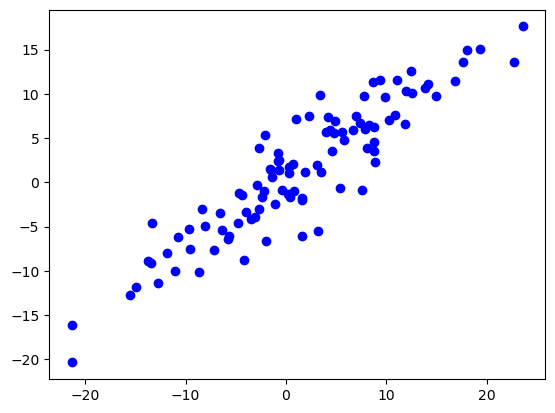

In [42]:
datos1 = pd.read_csv('ejercicio_1.csv',sep=',')
datos1.columns

graficar(datos1)